In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=71d5c44d2c1fb4d508bd2720a56d4ab5cc90cf8b619557e7d15d625e73db2b29
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import numpy as np

In [ ]:
spark = SparkSession.builder\
    .master("local[*]")\
    .appName("Crime Analysis builder")\
    .getOrCreate()
sc = spark.sparkContext

In [ ]:
# inferschema - to properly identify data types depend on the data when loading csv.O/w spark will identify all variables are stirng type
df = spark.read.csv('drive/My Drive/cleaned_v2.csv',header = True,inferSchema = True)

In [ ]:
rows = df.count()
cols = len(df.columns)
dedup_rows = df.distinct().count()

print("No of rows:",rows)
print("No of columns:",cols)
print("No of dedup records:",dedup_rows)

No of rows: 246706
No of columns: 22
No of dedup records: 246706


In [ ]:
# To view the dataset
df.show()

+----------+----------------+------+----+-------+-------------+--------------------+--------------------+----------+----------+--------------------+------------+------------+-------------+--------------------+------------+--------------------+---------------------------+----------------+------------------+-----------+-------------+
|     State|     Agency_type|Solved|Year|  Month|Report_status|          Crime_type|        Crime_status|Victim_age|Victim_sex|         Victim_race|Offender_age|Offender_sex|Offender_race|              Weapon|Relationship|         Crime_cause|Victim_prior_offense_status|add_victim_count|add_offender_count|     County|Offender_demo|
+----------+----------------+------+----+-------+-------------+--------------------+--------------------+----------+----------+--------------------+------------+------------+-------------+--------------------+------------+--------------------+---------------------------+----------------+------------------+-----------+-------------

In [ ]:
# tree like diagram of the dataset
df.printSchema()

root
 |-- State: string (nullable = true)
 |-- Agency_type: string (nullable = true)
 |-- Solved: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: string (nullable = true)
 |-- Report_status: string (nullable = true)
 |-- Crime_type: string (nullable = true)
 |-- Crime_status: string (nullable = true)
 |-- Victim_age: integer (nullable = true)
 |-- Victim_sex: string (nullable = true)
 |-- Victim_race: string (nullable = true)
 |-- Offender_age: integer (nullable = true)
 |-- Offender_sex: string (nullable = true)
 |-- Offender_race: string (nullable = true)
 |-- Weapon: string (nullable = true)
 |-- Relationship: string (nullable = true)
 |-- Crime_cause: string (nullable = true)
 |-- Victim_prior_offense_status: string (nullable = true)
 |-- add_victim_count: integer (nullable = true)
 |-- add_offender_count: integer (nullable = true)
 |-- County: string (nullable = true)
 |-- Offender_demo: string (nullable = true)



In [ ]:
df2 = df.toPandas()

In [ ]:
df2.head(10)

,State,Agency_type,Solved,Year,Month,Report_status,Crime_type,Crime_status,Victim_age,Victim_sex,...,Offender_sex,Offender_race,Weapon,Relationship,Crime_cause,Victim_prior_offense_status,add_victim_count,add_offender_count,County,Offender_demo
0,Alaska,Municipal police,Yes,2000,January,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,25,Female,...,Male,Black,Handgun,Wife,Other,Not specified,0,0,Anchorage,19-55M
1,Alabama,Sheriff,Yes,2000,January,Normal update,Murder and non-negligent manslaughter,Single victim/multiple offenders,24,Male,...,Male,White,Blunt object,Stranger,Other,Not specified,0,1,Mobile,19-55M
2,Arkansas,Municipal police,Yes,2000,January,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,33,Female,...,Male,Black,Firearm,Girlfriend,Other arguments,Not specified,0,0,Crittenden,19-55M
3,Arkansas,Municipal police,Yes,2000,January,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,3,Female,...,Male,Black,Personal weapons/Assaultive,Daughter,Other,Not specified,0,0,Jefferson,19-55M
4,Arkansas,Sheriff,Yes,2000,January,Normal update,Murder and non-negligent manslaughter,Single victim/multiple offenders,72,Male,...,Male,Black,Shotgun,Stranger,Robbery,Not specified,0,3,Lincoln,<18M
5,Arkansas,Sheriff,Yes,2000,January,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,41,Male,...,Male,White,Handgun,Stepfather,alcohol-induced fights,Not specified,0,0,Madison,<18M
6,Arkansas,Municipal police,Yes,2000,January,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,22,Male,...,Male,White,Knife/Blade,Acquaintance,Other arguments,Not specified,0,0,Mississippi,19-55M
7,Arkansas,Municipal police,Yes,2000,January,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,51,Male,...,Female,Black,Knife/Blade,Boyfriend,Other arguments,Not specified,0,0,Pulaski,19-55F
8,Arkansas,Municipal police,Yes,2000,January,Adjustment,Murder and non-negligent manslaughter,Single victim/single offender,32,Male,...,Male,Black,Strangulation/Hanging,Acquaintance,Unknown,Not specified,0,0,Pulaski,19-55M
9,Arkansas,Municipal police,Yes,2000,January,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,64,Male,...,Male,White,Handgun,Acquaintance,Robbery,Not specified,0,0,Sevier,19-55M


In [ ]:
# Set the style for all the graphs
#plt.style.use('seaborn')
sns.set_theme(style='darkgrid',context='paper')

Univariate Analysis

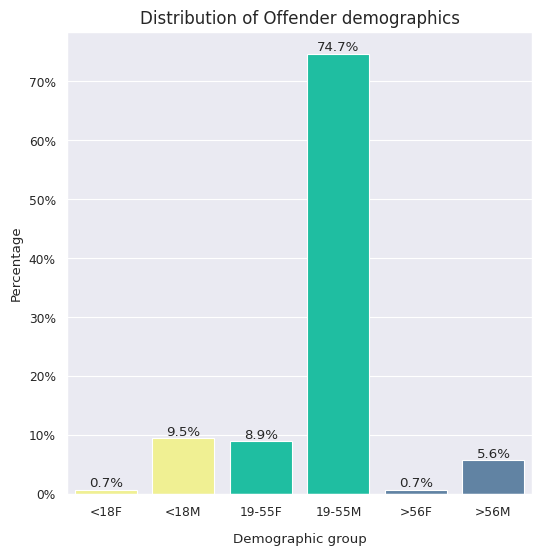

In [ ]:
# Distribution of Combined offender demographics
fig = plt.figure(figsize=(6, 6))
palette = ["#04d8b2","#ffff84","#04d8b2","#5684ae","#ffff84", "#5684ae"]

ax_b = sns.countplot(df2,x ='Offender_demo',stat='percent',
                     order=['<18F','<18M','19-55F','19-55M','>56F','>56M'],
                     hue='Offender_demo',
                     palette=palette)
plt.title("Distribution of Offender demographics",fontsize=12)
for container in ax_b.containers:
    ax_b.bar_label(container,fmt='%.1f%%',label_type='edge')
ax_b.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel("Demographic group",labelpad=10)
plt.ylabel("Percentage")
plt.show()

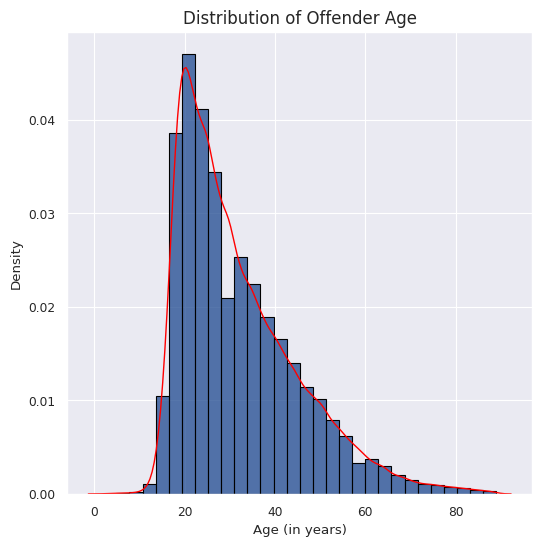

In [ ]:
# Distribution of Offender Age
fig = plt.figure(figsize=(6, 6))
ax_hist = sns.histplot(df2,x='Offender_age',
                  color='#1e488f', bins=30,stat= 'density',edgecolor='black')
ax_curve = sns.kdeplot(df2['Offender_age'], linewidth=1,color='red')
plt.title("Distribution of Offender Age",fontsize=12)
plt.xlabel("Age (in years)")
plt.ylabel("Density")
plt.show()

In [ ]:
# Generate numerical summaries for the offender age
df2[["Offender_age"]].describe()

,Offender_age
count,246706.000000
mean,31.897599
std,13.151453
min,2.000000
25%,22.000000
50%,28.000000
75%,39.000000
max,89.000000


<ipython-input-16-c1372f0e783c>:5: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax_b = sns.countplot(df2,x ='Offender_sex',stat='percent',hue='Offender_sex',palette=palette)


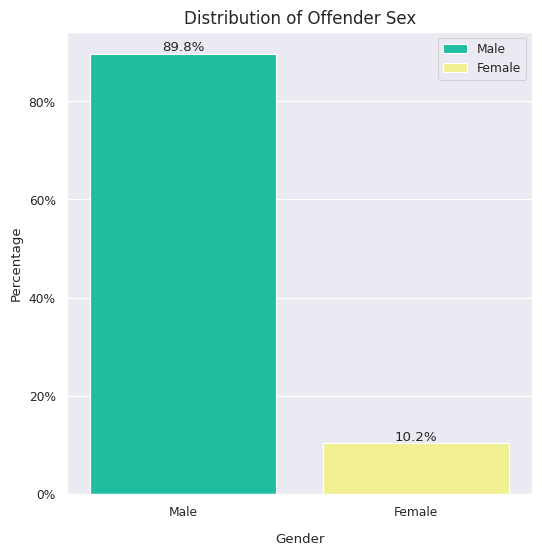

In [ ]:
# Distribution of Offender Sex
fig = plt.figure(figsize=(6, 6))
palette = ['#04d8b2','#ffff84','#5684ae']

ax_b = sns.countplot(df2,x ='Offender_sex',stat='percent',hue='Offender_sex',palette=palette)
plt.title("Distribution of Offender Sex",fontsize=12)
for container in ax_b.containers:
    ax_b.bar_label(container,fmt='%.1f%%',label_type='edge')
ax_b.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(labels =['Male','Female','Unknown'])
plt.xlabel("Gender",labelpad=10)
plt.ylabel("Percentage")
plt.show()

<ipython-input-17-013904db9c7b>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_b.set_xticklabels(labels=lbls) # add custom labes to x axis


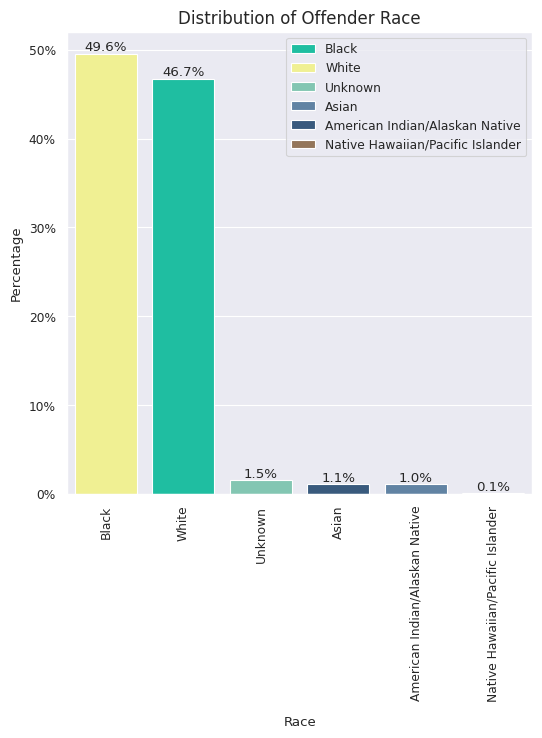

In [ ]:
# Distribution of Offender Race
fig = plt.figure(figsize=(6, 6))
palette = ['#04d8b2','#ffff84','#78d1b6','#5684ae','#2e5a88','#9d7651']

ax_b = sns.countplot(df2,x ='Offender_race',stat='percent',hue='Offender_race',
                     order=df2['Offender_race'].value_counts().index, # order % in decending order
                     palette=palette)
plt.title("Distribution of Offender Race",fontsize=12)
for container in ax_b.containers:
    ax_b.bar_label(container,fmt='%.1f%%',label_type='edge')

lbls =['Black','White','Unknown','Asian','American Indian/Alaskan Native','Native Hawaiian/Pacific Islander']

ax_b.yaxis.set_major_formatter(mtick.PercentFormatter()) # add % ticks to the y axis
ax_b.set_xticklabels(labels=lbls) # add custom labes to x axis
ax_b.tick_params(axis='x', labelrotation=90)  # to rorate x labels
plt.xlabel("Race",labelpad=10)
plt.ylabel("Percentage")
plt.legend(labels=lbls)
plt.show()

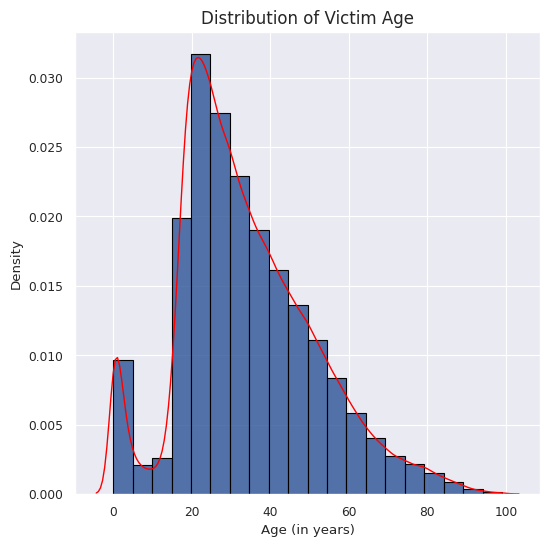

In [ ]:
# Distribution of Victim Age
fig = plt.figure(figsize=(6, 6))
ax_hist = sns.histplot(df2,x='Victim_age',
                  color='#1e488f', bins=20,stat= 'density',edgecolor='black')
ax_curve = sns.kdeplot(df2['Victim_age'], linewidth=1,color='red')
plt.title("Distribution of Victim Age",fontsize=12)
plt.xlabel("Age (in years)")
plt.ylabel("Density")
plt.show()

In [ ]:
df2[["Victim_age"]].describe()

,Victim_age
count,246706.000000
mean,34.037255
std,17.290832
min,0.000000
25%,22.000000
50%,31.000000
75%,45.000000
max,99.000000


<ipython-input-20-109808da0d35>:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax_b = sns.countplot(df2,x ='Victim_sex',stat='percent',hue='Victim_sex',


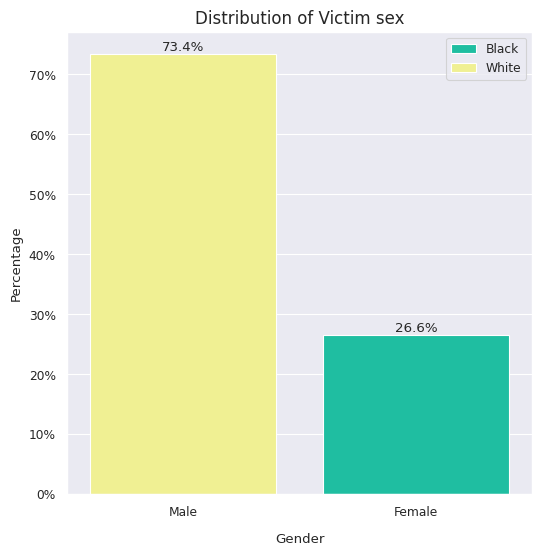

In [ ]:
# Distribution of Victim Race
fig = plt.figure(figsize=(6, 6))
palette = ['#04d8b2','#ffff84','#78d1b6','#5684ae','#2e5a88','#9d7651']

ax_b = sns.countplot(df2,x ='Victim_sex',stat='percent',hue='Victim_sex',
                     order=df2['Victim_sex'].value_counts().index, # order % in decending order
                     palette=palette)
for container in ax_b.containers:
    ax_b.bar_label(container,fmt='%.1f%%',label_type='edge')

ax_b.yaxis.set_major_formatter(mtick.PercentFormatter()) # add % ticks to the y axis
plt.xlabel("Gender",labelpad=10)
plt.ylabel("Percentage")
plt.title("Distribution of Victim sex",fontsize=12)
plt.legend(labels=lbls)
plt.show()

<ipython-input-21-29ab73949207>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_b.set_xticklabels(labels=lbls) # add custom labes to x axis
<ipython-input-21-29ab73949207>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_b.set_xticklabels(lbls,rotation=40, ha='right',rotation_mode='anchor')


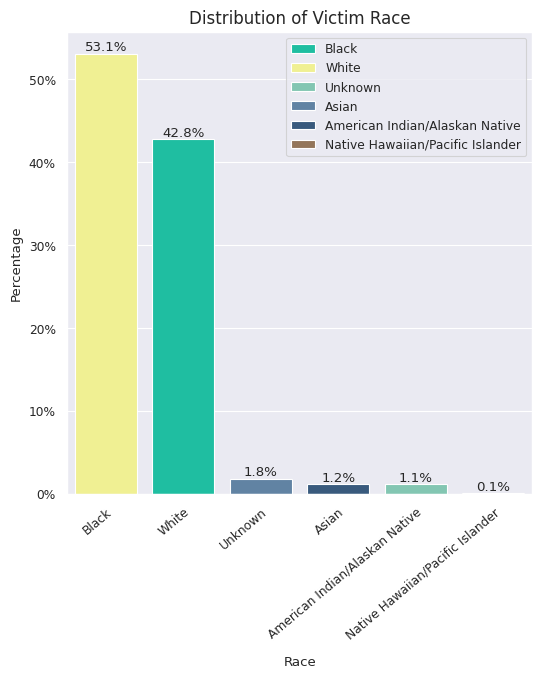

In [ ]:
# Distribution of Victim Race
fig = plt.figure(figsize=(6, 6))
palette = ['#04d8b2','#ffff84','#78d1b6','#5684ae','#2e5a88','#9d7651']

ax_b = sns.countplot(df2,x ='Victim_race',stat='percent',hue='Victim_race',
                     order=df2['Victim_race'].value_counts().index, # order % in decending order
                     palette=palette)
for container in ax_b.containers:
    ax_b.bar_label(container,fmt='%.1f%%',label_type='edge')

lbls =['Black','White','Unknown','Asian','American Indian/Alaskan Native','Native Hawaiian/Pacific Islander']
ax_b.yaxis.set_major_formatter(mtick.PercentFormatter()) # add % ticks to the y axis
ax_b.set_xticklabels(labels=lbls) # add custom labes to x axis
ax_b.set_xticklabels(lbls,rotation=40, ha='right',rotation_mode='anchor')
plt.xlabel("Race",labelpad=10)
plt.ylabel("Percentage")
plt.title("Distribution of Victim Race",fontsize=12)
plt.legend(labels=lbls)
plt.show()

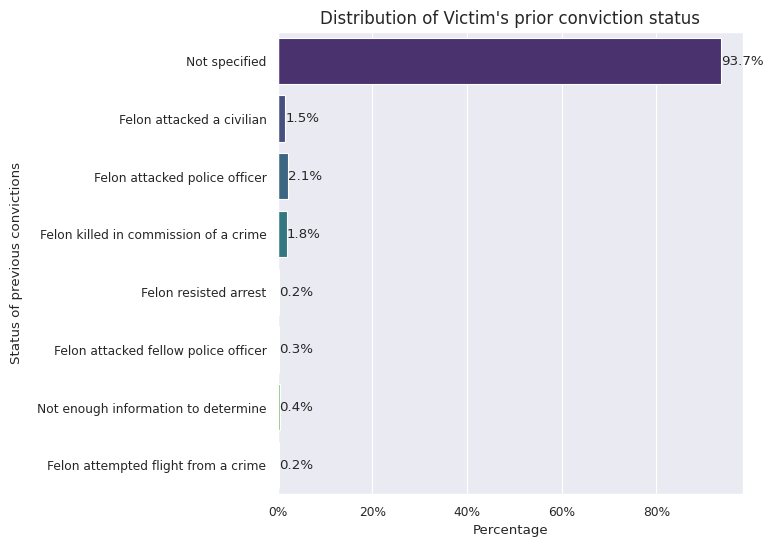

In [ ]:
# Distribution of conviction status of the victim
fig = plt.figure(figsize=(6, 6))

ax_b = sns.countplot(df2,y='Victim_prior_offense_status',stat='percent',
                     hue='Victim_prior_offense_status',
                     palette='viridis')

for container in ax_b.containers:
    ax_b.bar_label(container,fmt='%.1f%%',label_type='edge')

ax_b.xaxis.set_major_formatter(mtick.PercentFormatter())
#ax_b.set_xticklabels(lbls,rotation=40, ha='right',rotation_mode='anchor')
#ax_b.get_legend().set_visible(False)
plt.ylabel("Status of previous convictions",labelpad=10)
plt.xlabel("Percentage")
plt.title("Distribution of Victim's prior conviction status",fontsize=12)
plt.show()

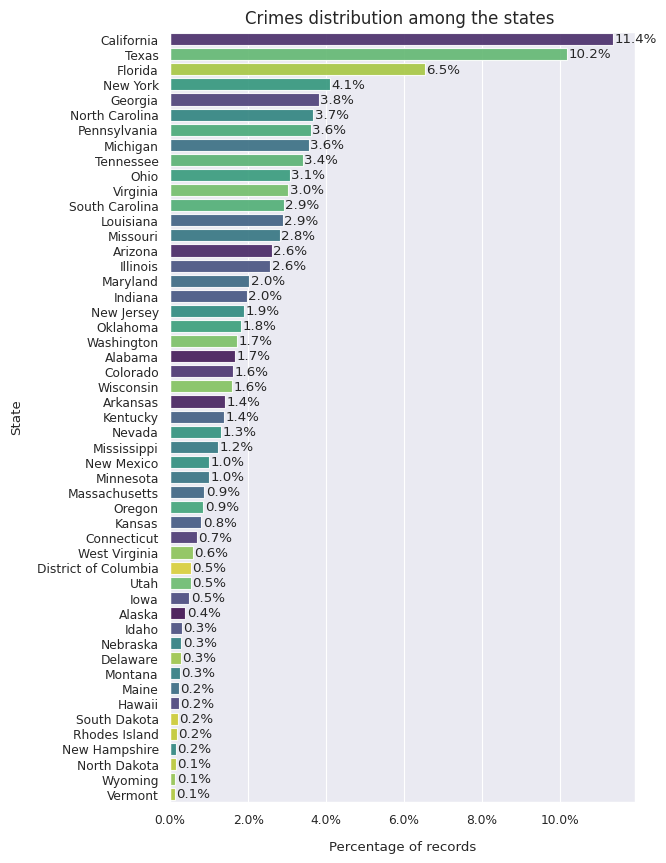

In [ ]:
# Distribution of crimes among the states
fig = plt.figure(figsize=(6, 10))

ax_b = sns.countplot(df2,y ='State',stat='percent',hue='State',  # to make a horizontal bar
                     order=df2['State'].value_counts().index,
                     palette='viridis',alpha=0.9)

for container in ax_b.containers:
    ax_b.bar_label(container,fmt='%.1f%%',label_type='edge',padding =1)

ax_b.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel("Percentage of records",labelpad=10)
plt.ylabel("State",labelpad=10)
plt.title("Crimes distribution among the states ",fontsize=12)
plt.show()

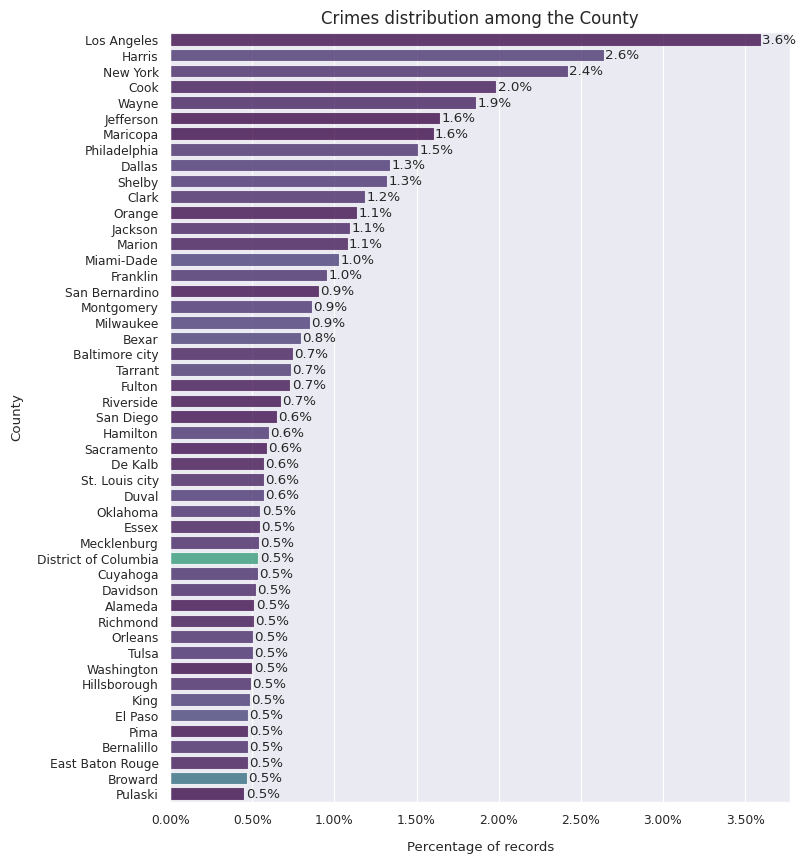

In [ ]:
# Distribution of Crime Incidents by County
fig = plt.figure(figsize=(8, 10))
lst_county = df2['County'].value_counts().index.tolist() # len =1733
top_50 = lst_county[0:49]
ax_b = sns.countplot(df2,y ='County',stat='percent',hue='County',
                     order=top_50,
                     palette='viridis',alpha=0.8)
for container in ax_b.containers:
    ax_b.bar_label(container,fmt='%.1f%%',label_type='edge',padding =1)

ax_b.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel("Percentage of records",labelpad=10)
plt.ylabel("County",labelpad=10)
plt.title("Crimes distribution among the County",fontsize=12)
plt.show()

<ipython-input-25-8d0c1b8ac315>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_l.set_xticklabels(xlabls,rotation=40, ha='right',rotation_mode='anchor')
<ipython-input-25-8d0c1b8ac315>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_l.set_yticklabels(ylabls)


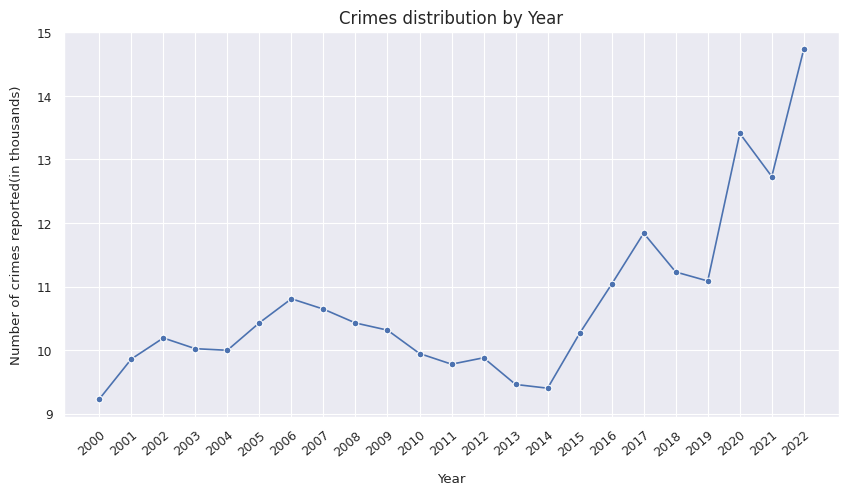

In [ ]:
# Distribution of Crime Incidents by Year

# Prepare the yearly counts
freq_yearly_crime = df2['Year'].value_counts().reset_index()  # rename(columns={'index':'year','Year':'count'}
freq_yearly_crime = freq_yearly_crime.sort_values(by=['Year'])
freq_yearly_crime.Year = freq_yearly_crime.Year.astype(str)

#Plot the line graph
fig = plt.figure(figsize=(10, 5))
ax_l = sns.lineplot(freq_yearly_crime,x ='Year',y='count',marker='o')

xlabls = freq_yearly_crime['Year'].tolist()
ylabls = [i for i in range(8,16)]
ax_l.set_xticklabels(xlabls,rotation=40, ha='right',rotation_mode='anchor')
ax_l.set_yticklabels(ylabls)

plt.ylabel("Number of crimes reported(in thousands)",labelpad=10)
plt.xlabel("Year",labelpad=10)
plt.title("Crimes distribution by Year",fontsize=12)
plt.show()

<ipython-input-26-395f72fdaf1d>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_b.set_xticklabels(xlabls,rotation=40, ha='right',rotation_mode='anchor')


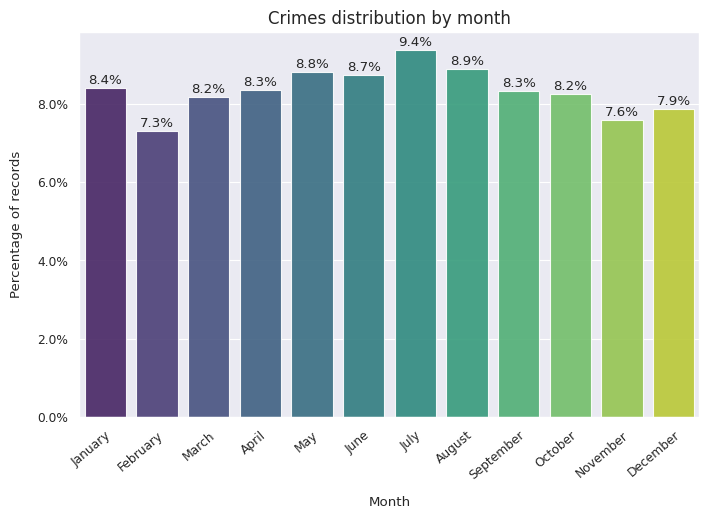

In [ ]:
# Distribution of Crime Incidents by Month
fig = plt.figure(figsize=(8, 5))
xlabls = ['January','February','March','April','May','June','July','August','September','October','November','December']

ax_b = sns.countplot(df2,x ='Month',stat='percent',hue='Month',
                     order = xlabls,
                     palette='viridis',alpha=0.9)
for container in ax_b.containers:
    ax_b.bar_label(container,fmt='%.1f%%',label_type='edge',padding =1)

ax_b.yaxis.set_major_formatter(mtick.PercentFormatter())
ax_b.set_xticklabels(xlabls,rotation=40, ha='right',rotation_mode='anchor')
plt.ylabel("Percentage of records",labelpad=10)
plt.xlabel("Month",labelpad=10)
plt.title("Crimes distribution by month",fontsize=12)
plt.show()

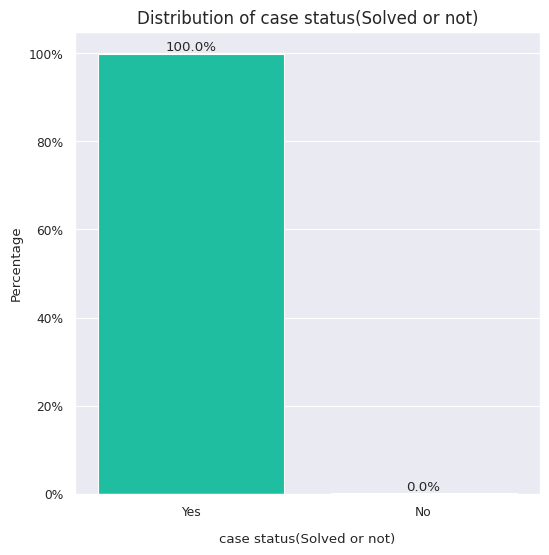

In [ ]:
# Distribution of case status(Solved or not)
fig = plt.figure(figsize=(6, 6))
palette = ['#04d8b2','#ffff84']

ax_b = sns.countplot(df2,x ='Solved',stat='percent',hue='Solved',
                     palette=palette)
plt.title("Distribution of case status(Solved or not)",fontsize=12)
for container in ax_b.containers:
    ax_b.bar_label(container,fmt='%.1f%%',label_type='edge')

ax_b.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel("case status(Solved or not)",labelpad=10)
plt.ylabel("Percentage")
plt.show()

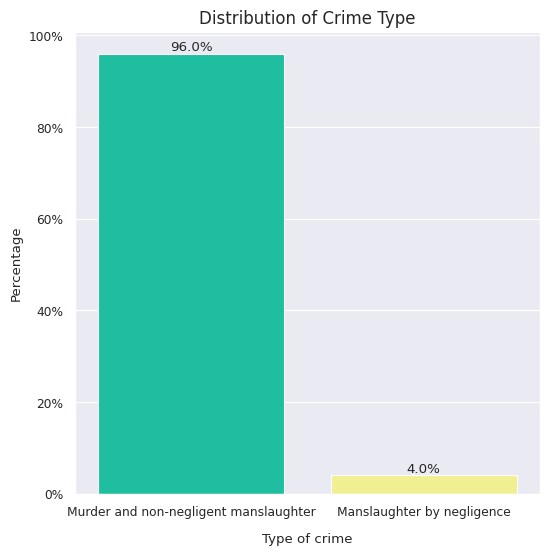

In [ ]:
# Distribution of Crime Type
fig = plt.figure(figsize=(6, 6))
palette = ['#04d8b2','#ffff84']

ax_b = sns.countplot(df2,x ='Crime_type',stat='percent',hue='Crime_type',
                     palette=palette)
plt.title("Distribution of Crime Type",fontsize=12)
for container in ax_b.containers:
    ax_b.bar_label(container,fmt='%.1f%%',label_type='edge')

ax_b.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel("Type of crime",labelpad=10)
plt.ylabel("Percentage")
plt.show()

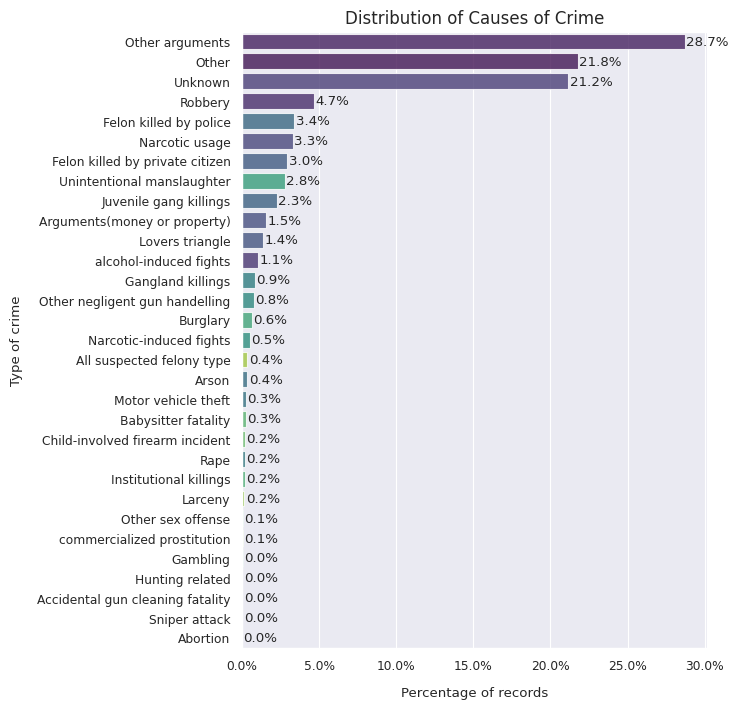

In [ ]:
# Distribution of Crime Causes
fig = plt.figure(figsize=(6, 8))

ax_b = sns.countplot(df2,y ='Crime_cause',stat='percent',hue='Crime_cause',  # to make a horizontal bar
                     order=df2['Crime_cause'].value_counts().index,
                     palette='viridis',alpha=0.8)
plt.title("Distribution of Causes of Crime",fontsize=12)
for container in ax_b.containers:
    ax_b.bar_label(container,fmt='%.1f%%',label_type='edge',padding =1)

ax_b.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel("Percentage of records",labelpad=10)
plt.ylabel("Type of crime",labelpad=10)
plt.show()

<ipython-input-30-d145cff77163>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_b.set_xticklabels(xlabls,rotation=40, ha='right',rotation_mode='anchor')


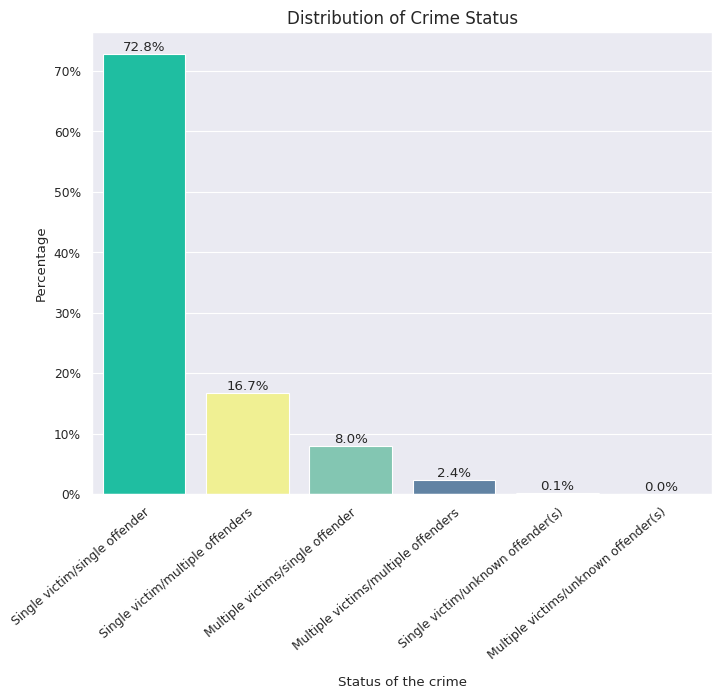

In [ ]:
# Distribution of Crime Status
fig1 = plt.figure(figsize=(8, 6))
palette = ['#04d8b2','#ffff84','#78d1b6','#5684ae','#2e5a88','#9d7651']

ax_b = sns.countplot(df2,x ='Crime_status',stat='percent',hue='Crime_status',
                     palette=palette)
for container in ax_b.containers:
    ax_b.bar_label(container,fmt='%.1f%%',label_type='edge')

xlabls = ["Single victim/single offender", "Single victim/multiple offenders","Multiple victims/single offender","Multiple victims/multiple offenders","Single victim/unknown offender(s)","Multiple victims/unknown offender(s)"]
ax_b.yaxis.set_major_formatter(mtick.PercentFormatter()) # add % ticks to the y axis
ax_b.set_xticklabels(xlabls,rotation=40, ha='right',rotation_mode='anchor')
plt.xlabel("Status of the crime",labelpad=10)
plt.ylabel("Percentage")
plt.title("Distribution of Crime Status",fontsize=12)
plt.show()

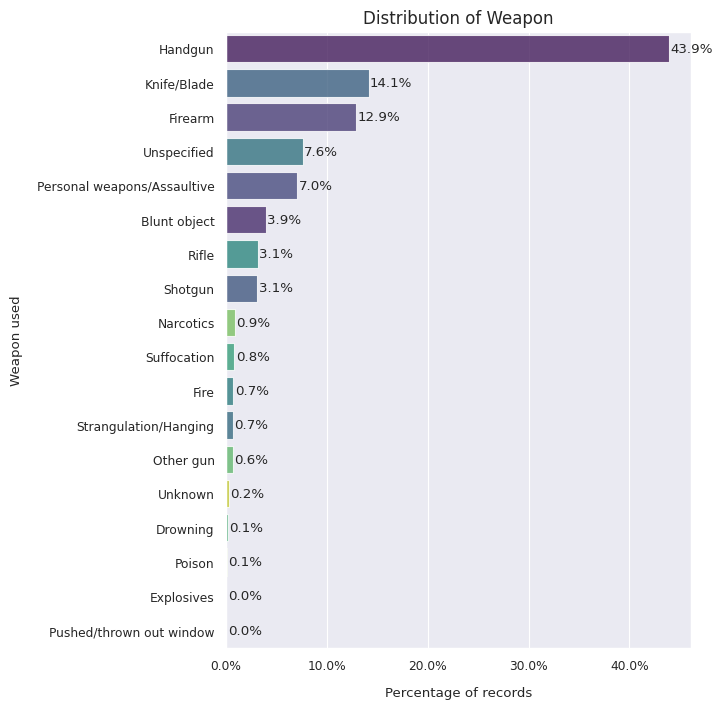

In [ ]:
# Distribution of Weapon used in crime
fig = plt.figure(figsize=(6, 8))

ax_b = sns.countplot(df2,y ='Weapon',stat='percent',hue='Weapon',  # to make a horizontal bar
                     order=df2['Weapon'].value_counts().index,
                     palette='viridis',alpha=0.8)
plt.title("Distribution of Weapon",fontsize=12)
for container in ax_b.containers:
    ax_b.bar_label(container,fmt='%.1f%%',label_type='edge',padding =1)

ax_b.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel("Percentage of records",labelpad=10)
plt.ylabel("Weapon used",labelpad=10)
plt.show()

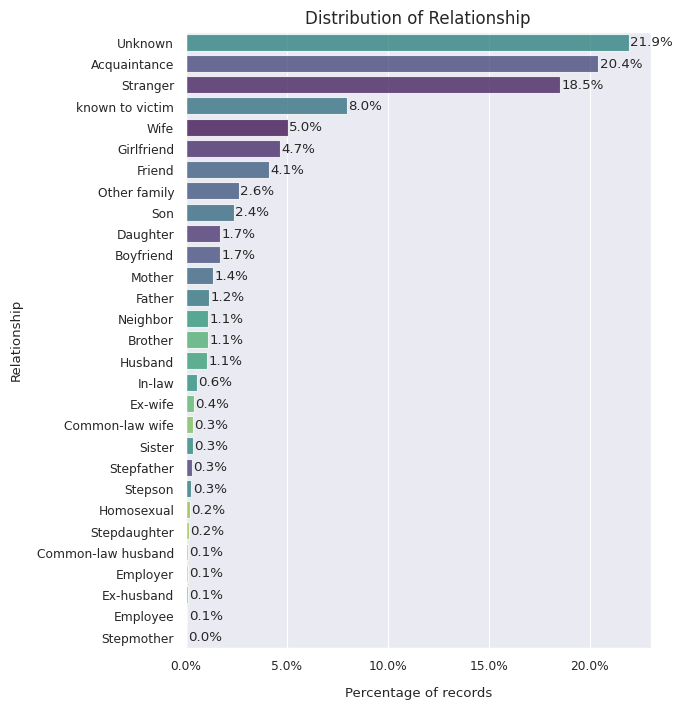

In [ ]:
# Distribution of Relationship between Victim and Offender
fig = plt.figure(figsize=(6, 8))

ax_b = sns.countplot(df2,y ='Relationship',stat='percent',hue='Relationship',  # to make a horizontal bar
                     order=df2['Relationship'].value_counts().index,
                     palette='viridis',alpha=0.8)
plt.title("Distribution of Relationship",fontsize=12)
for container in ax_b.containers:
    ax_b.bar_label(container,fmt='%.1f%%',label_type='edge',padding =1)

ax_b.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel("Percentage of records",labelpad=10)
plt.ylabel("Relationship",labelpad=10)
plt.show()

Bi-variate Analysis

* Offender demographics(combined new target)



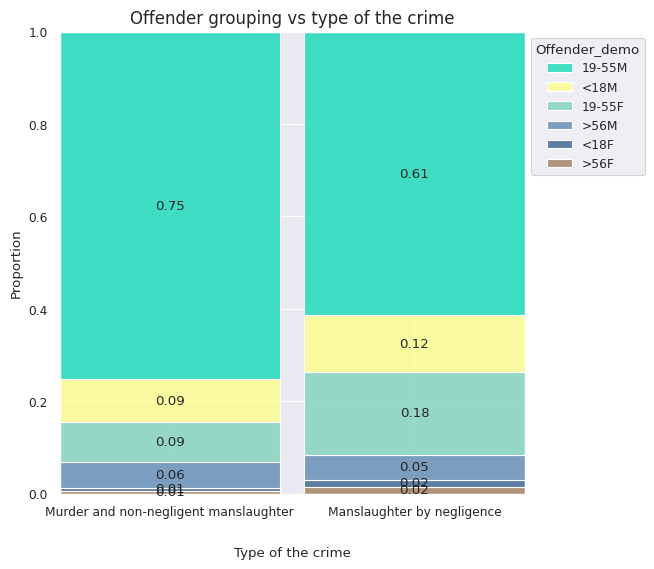

In [ ]:
# Distribution of Offender sex vs crime type
fig = plt.figure(figsize=(6,6))
palette = ['#04d8b2','#ffff84','#78d1b6','#5684ae','#2e5a88','#9d7651']

ax_sb = sns.histplot(df2,x ='Crime_type',stat='percent',hue='Offender_demo',
                    multiple="fill",shrink= 0.9,
                    palette=palette)
for container in ax_sb.containers:
    ax_sb.bar_label(container,fmt='%.2f',label_type='center')
sns.move_legend(ax_sb, "upper left", bbox_to_anchor=(1, 1))


plt.xlabel("Type of the crime",labelpad=20)
plt.ylabel("Proportion")
plt.title("Offender grouping vs type of the crime",fontsize=12)
plt.show()

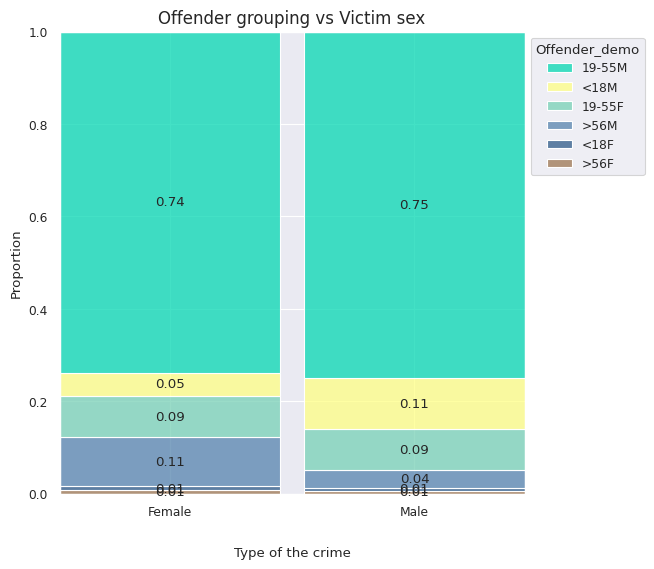

In [ ]:
# Distribution of Victim sex vs offender demo
fig = plt.figure(figsize=(6,6))
palette = ['#04d8b2','#ffff84','#78d1b6','#5684ae','#2e5a88','#9d7651']

ax_sb = sns.histplot(df2,x ='Victim_sex',stat='percent',hue='Offender_demo',
                    multiple="fill",shrink= 0.9,
                    palette=palette)
for container in ax_sb.containers:
    ax_sb.bar_label(container,fmt='%.2f',label_type='center')
sns.move_legend(ax_sb, "upper left", bbox_to_anchor=(1, 1))


plt.xlabel("Type of the crime",labelpad=20)
plt.ylabel("Proportion")
plt.title("Offender grouping vs Victim sex",fontsize=12)
plt.show()

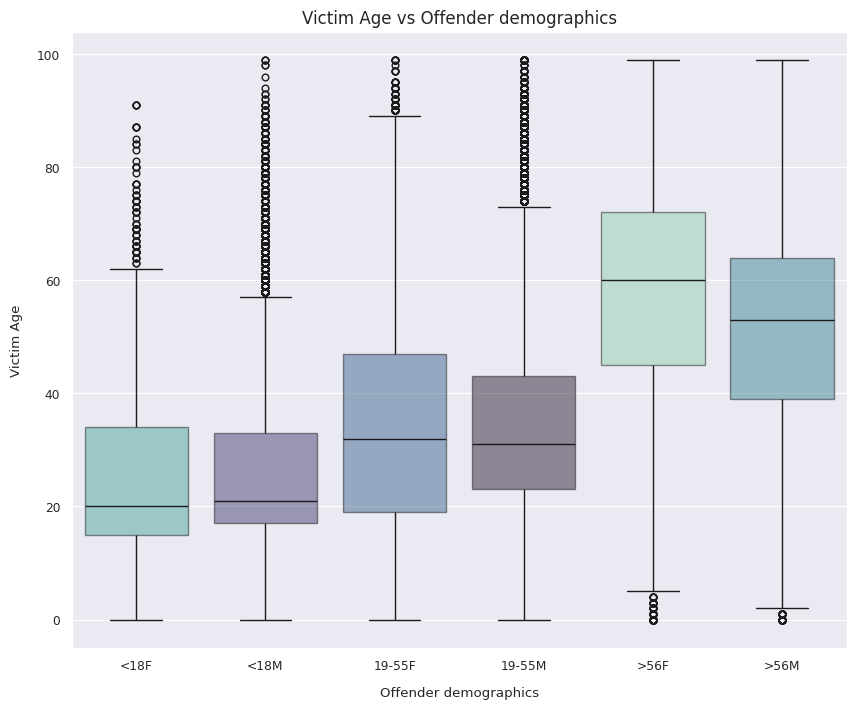

In [ ]:
# Offenders age vs victim age
fig = plt.figure(figsize=(10, 8))
#order = df2.Offender_age.groupby(df2.Weapon).median().sort_values(ascending=False).index.values

ax_bx = sns.boxplot(df2,y='Victim_age',x='Offender_demo',order=['<18F','<18M','19-55F','19-55M','>56F','>56M'],
                    hue = 'Offender_demo',
                    palette='mako',boxprops=dict(alpha=.5))

plt.xlabel("Offender demographics",labelpad=10)
plt.ylabel("Victim Age",labelpad=10)
plt.title("Victim Age vs Offender demographics",fontsize=12)
plt.show()

In [ ]:
df2.groupby(['Offender_demo'])['Victim_age'].mean()

Offender_demo
19-55F    32.103440
19-55M    33.716910
<18F      24.143791
<18M      26.835298
>56F      57.285541
>56M      51.858459
Name: Victim_age, dtype: float64

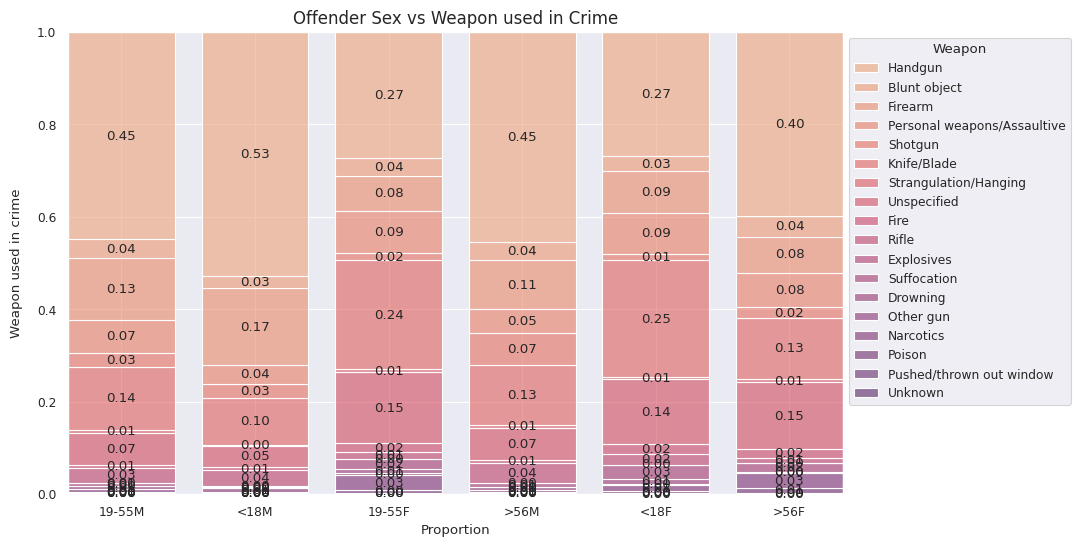

In [ ]:
# Distribution of Offender sex vs weapon
fig = plt.figure(figsize=(10, 6))


ax_sb = sns.histplot(df2,x ='Offender_demo',stat='percent',hue='Weapon',
                    multiple="fill", shrink=.8,
                    palette='flare',alpha=.6)
for container in ax_sb.containers:
    ax_sb.bar_label(container,fmt='%.2f',label_type='center')
sns.move_legend(ax_sb, "upper left", bbox_to_anchor=(1, 1))
plt.ylabel("Weapon used in crime",labelpad=10)
plt.xlabel("Proportion")
plt.title("Offender Sex vs Weapon used in Crime",fontsize=12)
plt.show()

- Offender Age

<ipython-input-38-a400208375ba>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_bx = sns.boxplot(df2,y ='Offender_age',x='Offender_sex',palette=palette)


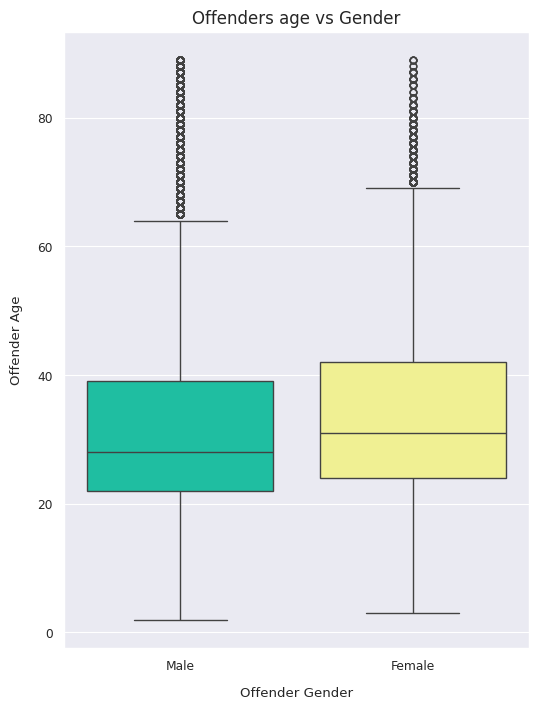

In [ ]:
# Offenders age vs Gender
fig = plt.figure(figsize=(6, 8))
palette = ['#04d8b2','#ffff84']

ax_bx = sns.boxplot(df2,y ='Offender_age',x='Offender_sex',palette=palette)

plt.ylabel("Offender Age",labelpad=10)
plt.xlabel("Offender Gender",labelpad=10)
plt.title("Offenders age vs Gender",fontsize=12)
plt.show()


In [ ]:
df2.groupby(['Offender_sex'])['Offender_age'].mean()

Offender_sex
Female    33.785680
Male      31.682304
Name: Offender_age, dtype: float64

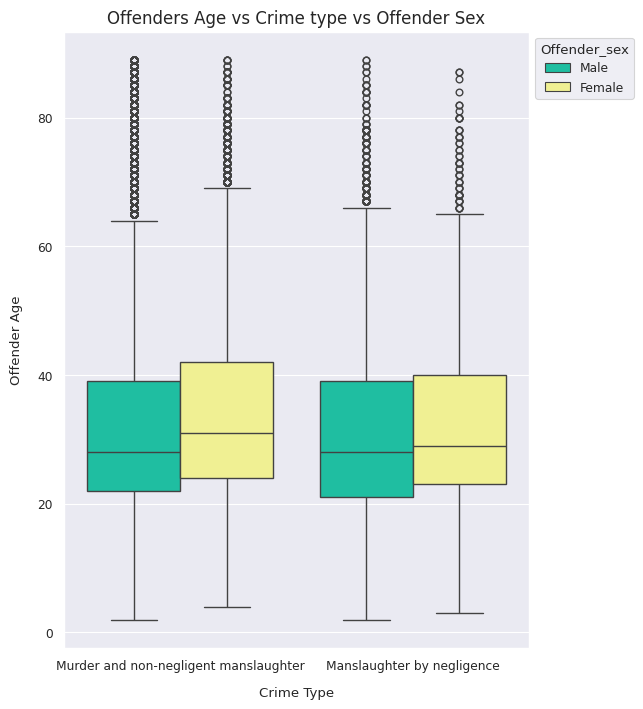

In [ ]:
# Offenders age vs Gender vs crime type
fig = plt.figure(figsize=(6, 8))
palette = ['#04d8b2','#ffff84']

ax_bx = sns.boxplot(df2,y ='Offender_age',x='Crime_type',hue='Offender_sex',palette = palette)

plt.ylabel("Offender Age",labelpad=10)
plt.xlabel("Crime Type",labelpad=10)
plt.title("Offenders Age vs Crime type vs Offender Sex",fontsize=12)
#ax_bx.get_legend().set_visible(False)  # to remove legend
sns.move_legend(ax_bx, "upper left", bbox_to_anchor=(1, 1)) # to move the legend
plt.show()

In [ ]:
df2.groupby(['Crime_type','Offender_sex'])['Offender_age'].mean()

Crime_type                             Offender_sex
Manslaughter by negligence             Female          32.939659
                                       Male            31.255006
Murder and non-negligent manslaughter  Female          33.860629
                                       Male            31.697782
Name: Offender_age, dtype: float64

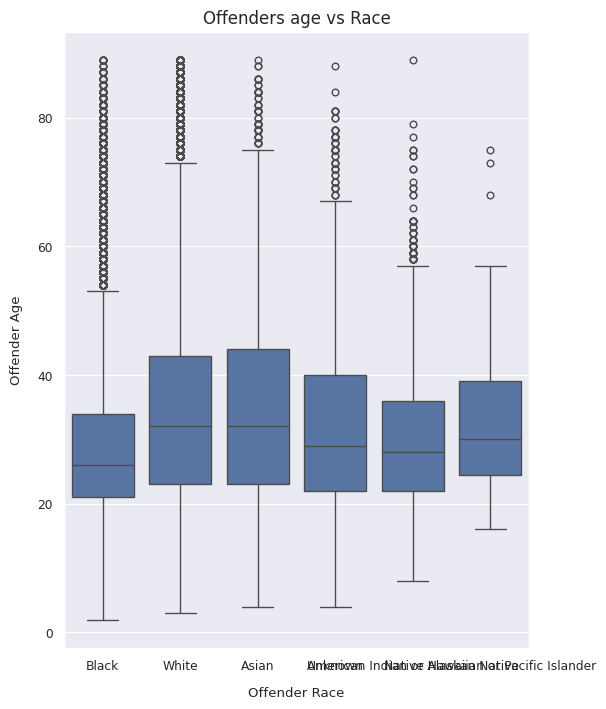

In [ ]:
# Offenders age vs victim gender
fig = plt.figure(figsize=(6, 8))

ax_bx = sns.boxplot(df2,y ='Offender_age',x='Offender_race')
#ax_b.set_xticklabels(xlabls,rotation=40, ha='right',rotation_mode='anchor')
plt.ylabel("Offender Age",labelpad=10)
plt.xlabel("Offender Race",labelpad=10)
plt.title("Offenders age vs Race",fontsize=12)
plt.show()

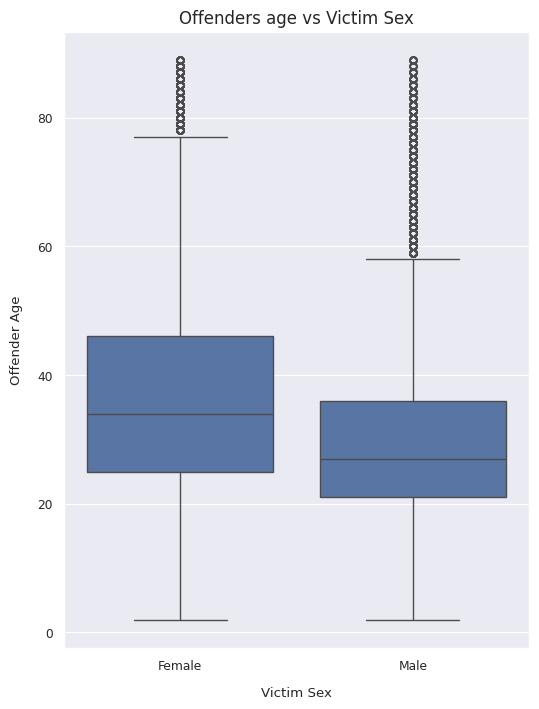

In [ ]:
# Offenders age vs victim gender
fig = plt.figure(figsize=(6, 8))

ax_bx = sns.boxplot(df2,y ='Offender_age',x='Victim_sex')

plt.ylabel("Offender Age",labelpad=10)
plt.xlabel("Victim Sex",labelpad=10)
plt.title("Offenders age vs Victim Sex",fontsize=12)
plt.show()

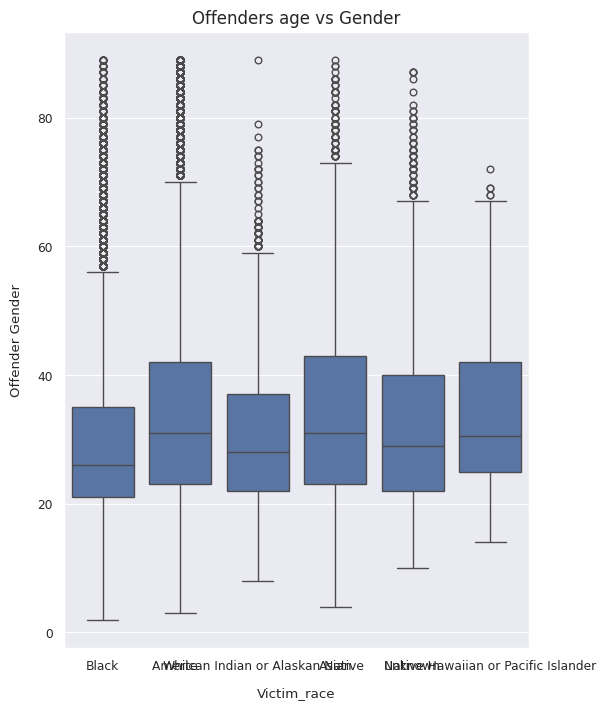

In [ ]:
# Offenders age vs victim gender
fig = plt.figure(figsize=(6, 8))

ax_bx = sns.boxplot(df2,y ='Offender_age',x='Victim_race')

plt.xlabel("Victim_race",labelpad=10)
plt.ylabel("Offender Gender",labelpad=10)
plt.title("Offenders age vs Gender",fontsize=12)
plt.show()

* Combined plots


<ipython-input-46-e1c12990bf04>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(xlabls,rotation=90, ha='right',rotation_mode='anchor')


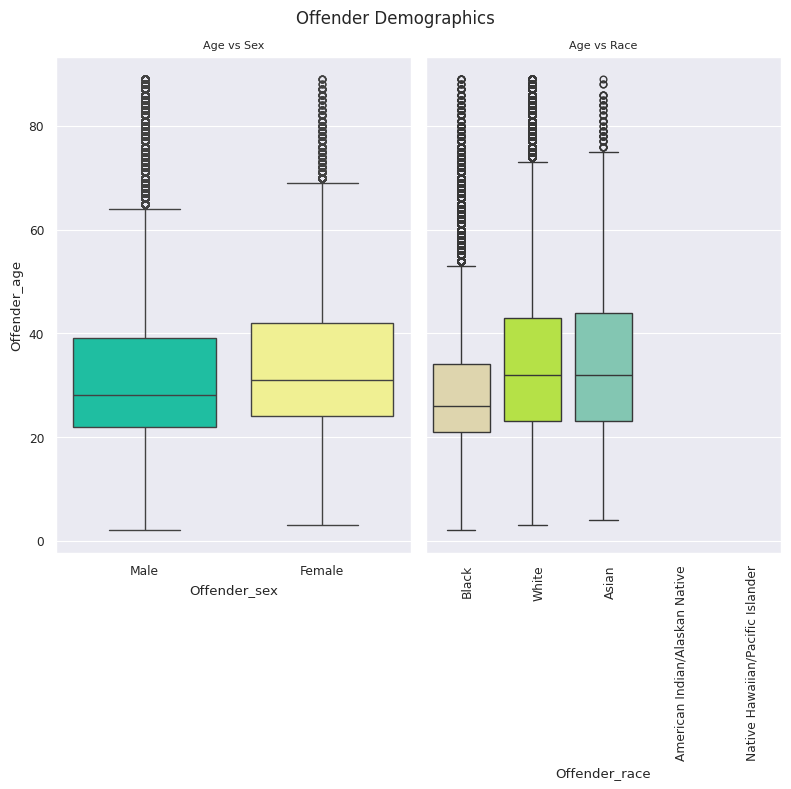

In [ ]:
fig , axs = plt.subplots(1,2,sharey=True,figsize=(8,8))
palette1 = ['#04d8b2','#ffff84']
palette2 = ['#e6daa6','#c0fb2d','#78d1b6','#5684ae','#2e5a88','#9d7651']

sns.boxplot(df2,y ='Offender_age',x='Offender_sex',hue='Offender_sex',palette=palette1,ax=axs[0])
#axs[0].get_legend().set_visible(False)  # to remove legend

xlabls = ['Black','White','Asian','American Indian/Alaskan Native','Native Hawaiian/Pacific Islander']
sns.boxplot(df2,y ='Offender_age',x='Offender_race',hue='Offender_race',
            order = xlabls,
            palette=palette2,ax=axs[1])
axs[1].set_xticklabels(xlabls,rotation=90, ha='right',rotation_mode='anchor')
#sns.move_legend(axs[1], "upper left", bbox_to_anchor=(1, 1)) # to move the legend
#axs[1].get_legend().set_visible(False)

plt.suptitle("Offender Demographics",fontsize=12)
axs[0].set_title("Age vs Sex",fontsize=8)
axs[1].set_title("Age vs Race",fontsize=8)
fig.tight_layout()
plt.show()

<ipython-input-47-c0673f6ba842>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(xlabls,rotation=90, ha='right',rotation_mode='anchor')


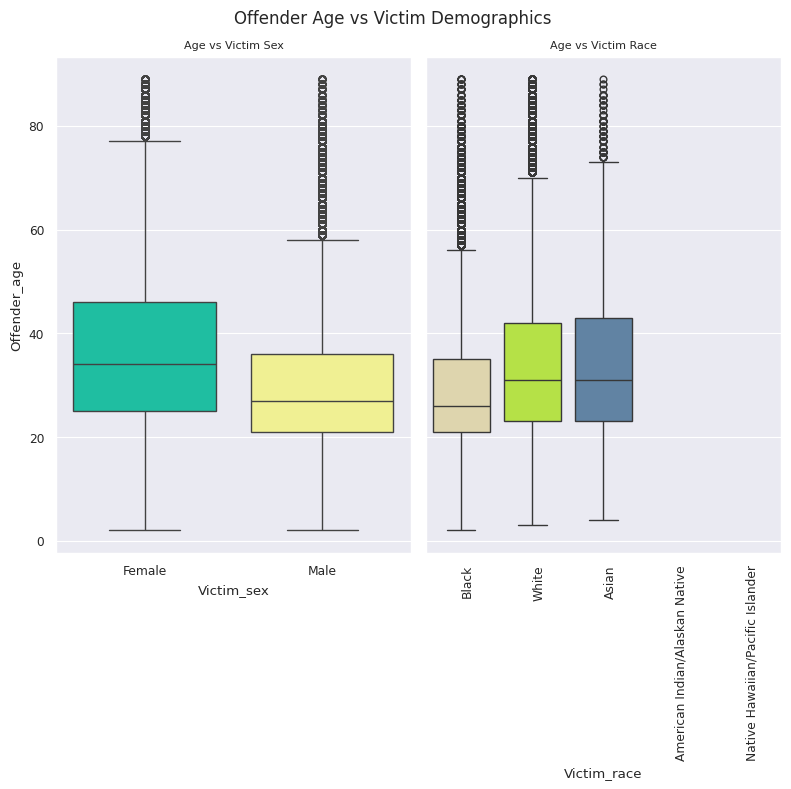

In [ ]:
fig , axs = plt.subplots(1,2,sharey=True,figsize=(8,8))
palette1 = ['#04d8b2','#ffff84']
palette2 = ['#e6daa6','#c0fb2d','#78d1b6','#5684ae','#2e5a88','#9d7651']

sns.boxplot(df2,y ='Offender_age',x='Victim_sex',hue='Victim_sex',palette=palette1,ax=axs[0])
#axs[0].get_legend().set_visible(False)  # to remove legend

xlabls = ['Black','White','Asian','American Indian/Alaskan Native','Native Hawaiian/Pacific Islander']
sns.boxplot(df2,y ='Offender_age',x='Victim_race',hue='Victim_race',
            order = xlabls,
            palette=palette2,ax=axs[1])
axs[1].set_xticklabels(xlabls,rotation=90, ha='right',rotation_mode='anchor')
#sns.move_legend(axs[1], "upper left", bbox_to_anchor=(1, 1)) # to move the legend
#axs[1].get_legend().set_visible(False)

plt.suptitle("Offender Age vs Victim Demographics ",fontsize=12)
axs[0].set_title("Age vs Victim Sex",fontsize=8)
axs[1].set_title("Age vs Victim Race",fontsize=8)
fig.tight_layout()
plt.show()

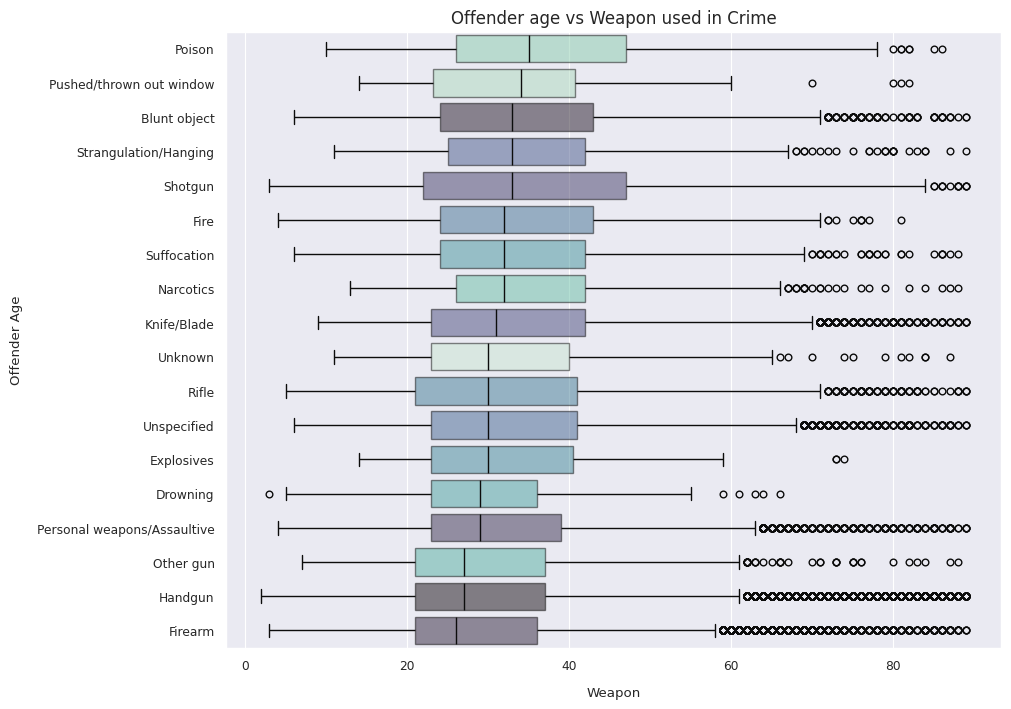

In [ ]:
# Offenders age vs Weapon
fig = plt.figure(figsize=(10, 8))
order = df2.Offender_age.groupby(df2.Weapon).median().sort_values(ascending=False).index.values

ax_bx = sns.boxplot(df2,x='Offender_age',y='Weapon',order=order,
                    hue = 'Weapon',
                    palette='mako',boxprops=dict(alpha=.5))

plt.xlabel("Weapon",labelpad=10)
plt.ylabel("Offender Age",labelpad=10)
plt.title("Offender age vs Weapon used in Crime",fontsize=12)
plt.show()

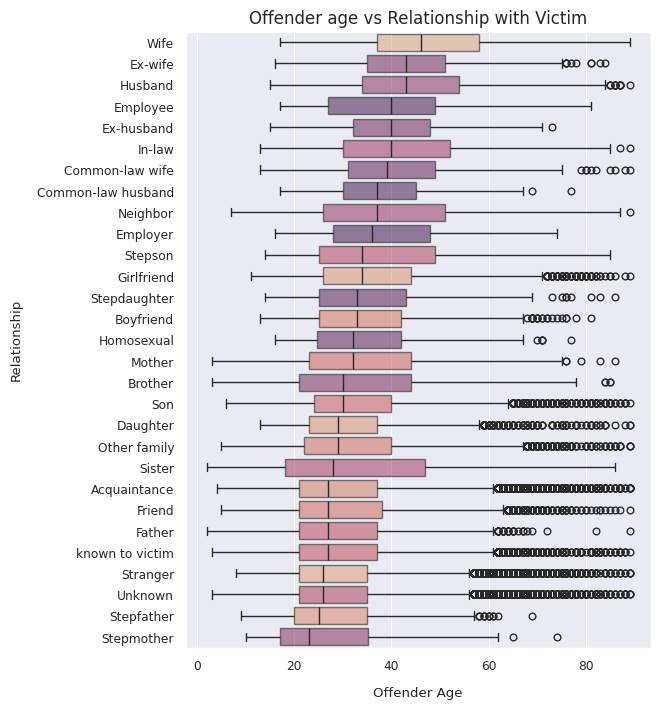

In [ ]:
fig = plt.figure(figsize=(6, 8))
order = df2.Offender_age.groupby(df2.Relationship).median().sort_values(ascending=False).index.values

ax_bx = sns.boxplot(df2,x ='Offender_age',y='Relationship',order=order,
                    hue='Relationship',
                    palette='flare',boxprops=dict(alpha=.6))

plt.ylabel("Relationship",labelpad=10)
plt.xlabel("Offender Age",labelpad=10)
plt.title("Offender age vs Relationship with Victim",fontsize=12)
plt.show()

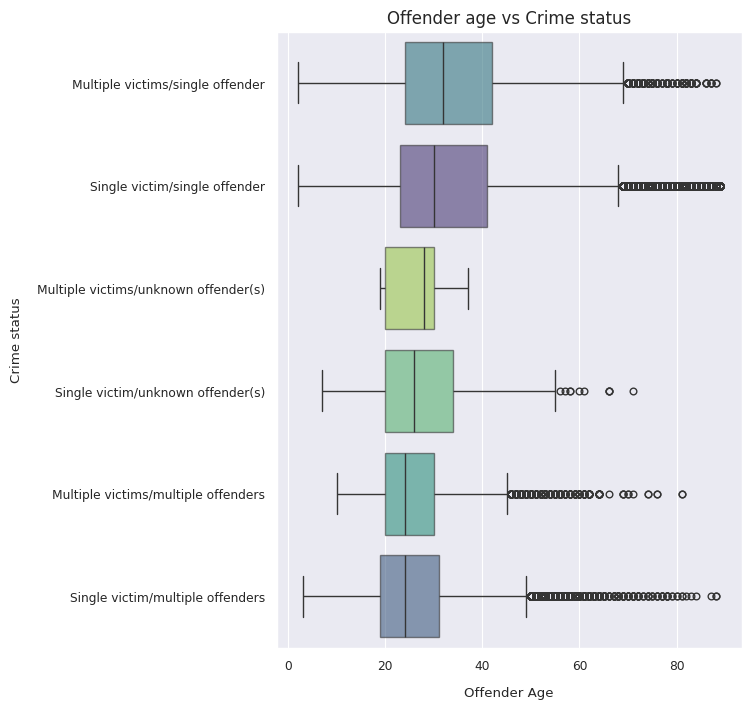

In [ ]:
fig = plt.figure(figsize=(6, 8))
order = df2.Offender_age.groupby(df2.Crime_status).median().sort_values(ascending=False).index.values

ax_bx = sns.boxplot(df2,x ='Offender_age',y='Crime_status',order=order,
                    hue='Crime_status',
                    palette='viridis',boxprops=dict(alpha=.6))

plt.ylabel("Crime status",labelpad=10)
plt.xlabel("Offender Age",labelpad=10)
plt.title("Offender age vs Crime status",fontsize=12)
plt.show()

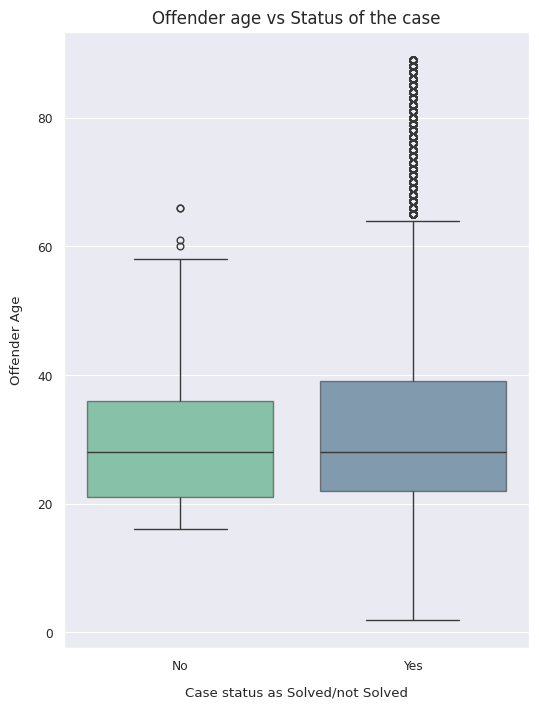

In [ ]:
fig = plt.figure(figsize=(6, 8))
order = df2.Offender_age.groupby(df2.Solved).median().sort_values(ascending=False).index.values

ax_bx = sns.boxplot(df2,y ='Offender_age',x='Solved',order=order,
                    hue='Solved',
                    palette='viridis',boxprops=dict(alpha=.6))

plt.xlabel("Case status as Solved/not Solved",labelpad=10)
plt.ylabel("Offender Age",labelpad=10)
plt.title("Offender age vs Status of the case",fontsize=12)
plt.show()

<ipython-input-52-84be6ecdc1a3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_bx = sns.boxplot(df2,y ='Offender_age',x='Report_status',palette=palette)


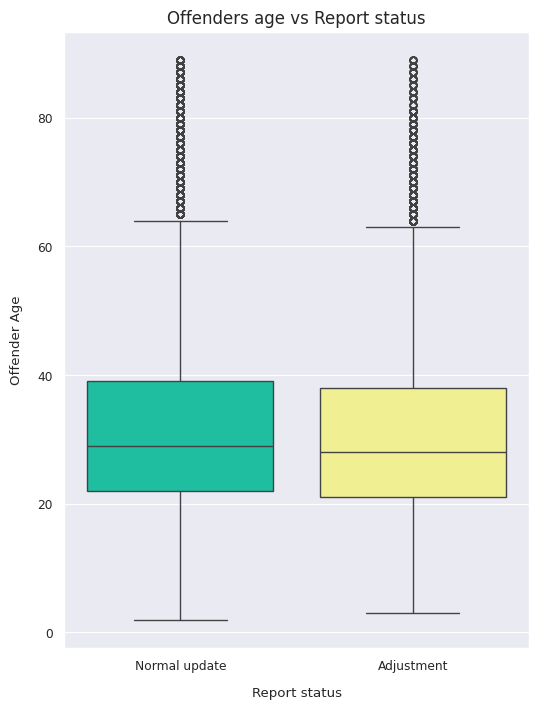

In [ ]:
# Offenders age vs Gender
fig = plt.figure(figsize=(6, 8))
palette = ['#04d8b2','#ffff84']

ax_bx = sns.boxplot(df2,y ='Offender_age',x='Report_status',palette=palette)

plt.ylabel("Offender Age",labelpad=10)
plt.xlabel("Report status",labelpad=10)
plt.title("Offenders age vs Report status",fontsize=12)
plt.show()

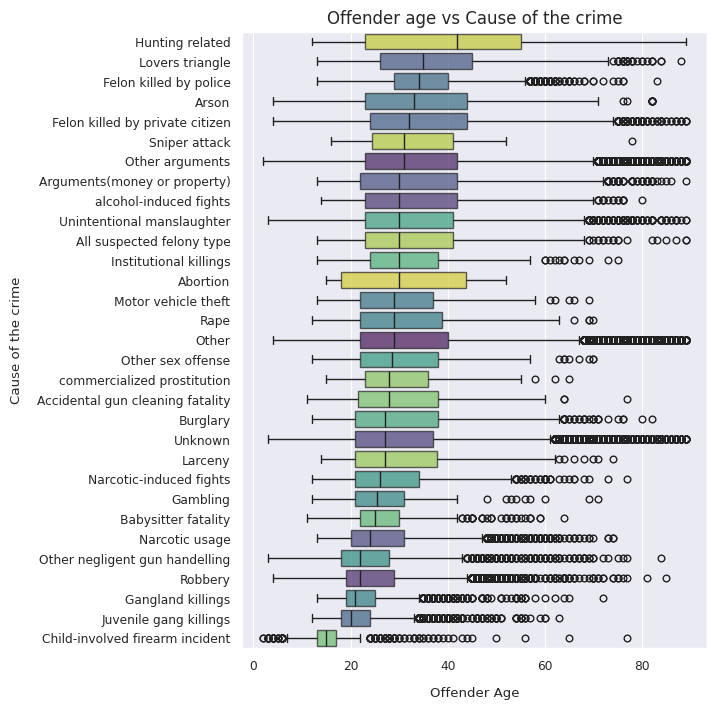

In [ ]:
fig = plt.figure(figsize=(6, 8))
order = df2.Offender_age.groupby(df2.Crime_cause).median().sort_values(ascending=False).index.values

ax_bx = sns.boxplot(df2,x ='Offender_age',y='Crime_cause',order=order,
                    hue='Crime_cause',
                    palette='viridis',boxprops=dict(alpha=.7))

plt.ylabel("Cause of the crime",labelpad=10)
plt.xlabel("Offender Age",labelpad=10)
plt.title("Offender age vs Cause of the crime",fontsize=12)
plt.show()

- Offender Sex

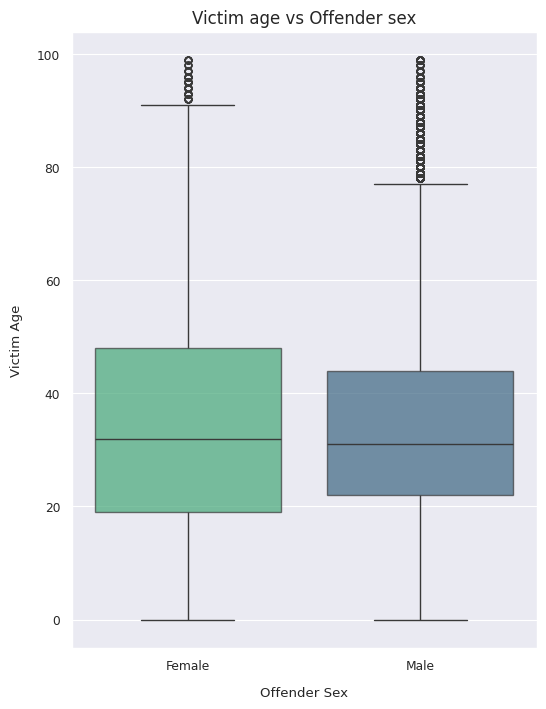

In [ ]:
# Distribution of Offender sex vs victim age
fig = plt.figure(figsize=(6, 8))
order = df2.Victim_age.groupby(df2.Offender_sex).median().sort_values(ascending=False).index.values

ax_bx = sns.boxplot(df2,y ='Victim_age',x='Offender_sex',order=order,
                    hue='Offender_sex',
                    palette='viridis',boxprops=dict(alpha=.7))

plt.ylabel("Victim Age",labelpad=10)
plt.xlabel("Offender Sex",labelpad=10)
plt.title("Victim age vs Offender sex",fontsize=12)
plt.show()

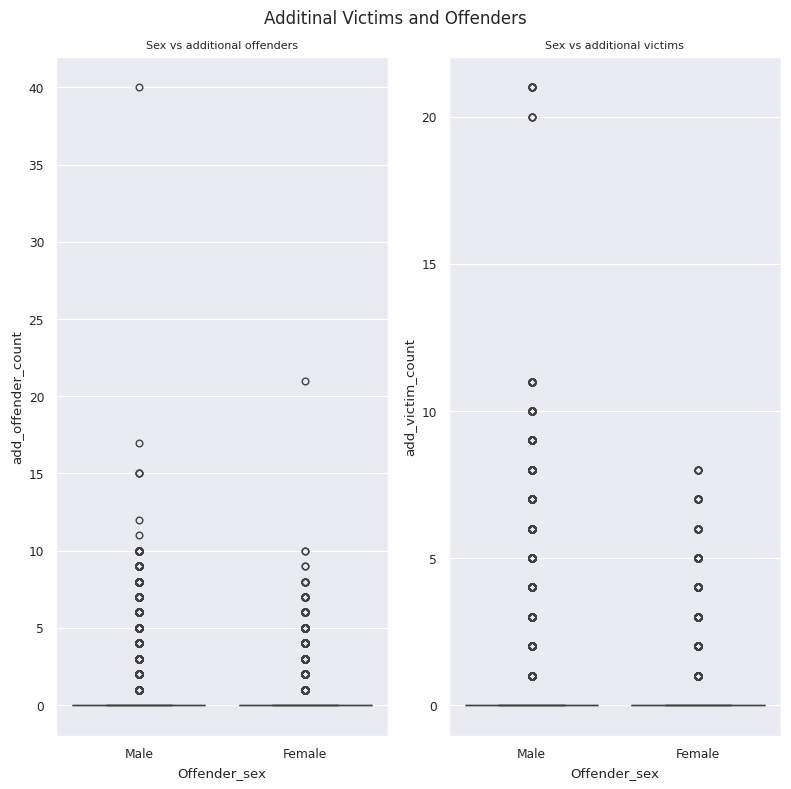

In [ ]:
# Distribution of Offender sex vs additional victims and offenders
fig , axs = plt.subplots(1,2,sharex=True,figsize=(8,8))
palette = ['#04d8b2','#ffff84']

sns.boxplot(df2,y ='add_offender_count',x='Offender_sex',hue='Offender_sex',palette=palette,ax=axs[0])
#axs[0].get_legend().set_visible(False)  # to remove legend

sns.boxplot(df2,y ='add_victim_count',x='Offender_sex',hue='Offender_sex',
            palette=palette,ax=axs[1])
#sns.move_legend(axs[1], "upper left", bbox_to_anchor=(1, 1)) # to move the legend

plt.suptitle("Additinal Victims and Offenders",fontsize=12)
axs[0].set_title("Sex vs additional offenders",fontsize=8)
axs[1].set_title("Sex vs additional victims",fontsize=8)
fig.tight_layout()
plt.show()

In [ ]:
df2.groupby(['Offender_sex'])['add_victim_count'].mean()

Offender_sex
Female    0.114724
Male      0.167958
Name: add_victim_count, dtype: float64

In [ ]:
df2.groupby(['Offender_sex'])['add_offender_count'].mean()

Offender_sex
Female    0.300768
Male      0.309143
Name: add_offender_count, dtype: float64

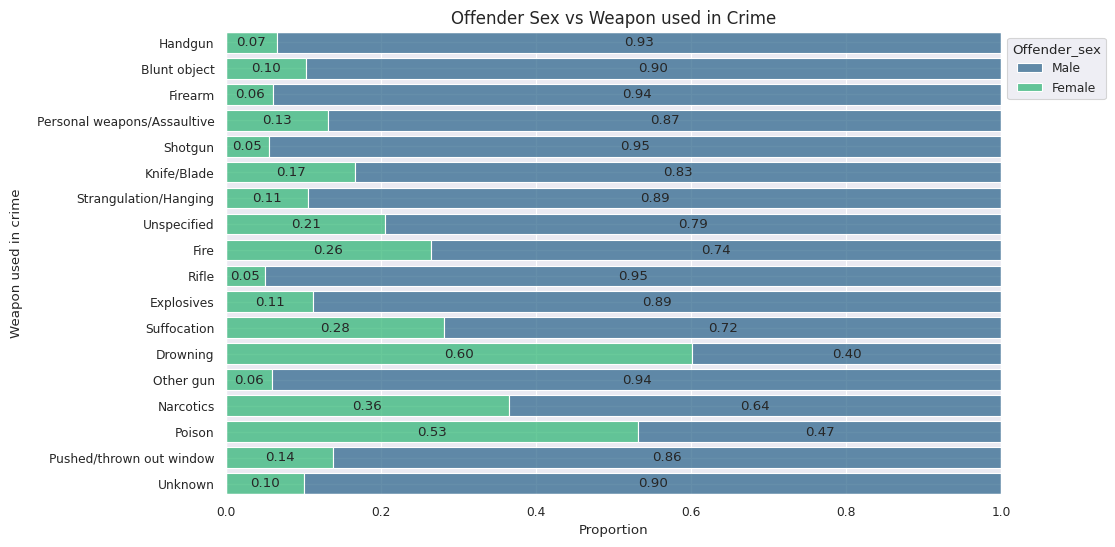

In [ ]:
# Distribution of Offender sex vs weapon
fig = plt.figure(figsize=(10, 6))


ax_sb = sns.histplot(df2,y ='Weapon',stat='percent',hue='Offender_sex',
                    multiple="fill", shrink=.8,
                    palette='viridis')
for container in ax_sb.containers:
    ax_sb.bar_label(container,fmt='%.2f',label_type='center')
sns.move_legend(ax_sb, "upper left", bbox_to_anchor=(1, 1))


plt.ylabel("Weapon used in crime",labelpad=10)
plt.xlabel("Proportion")
plt.title("Offender Sex vs Weapon used in Crime",fontsize=12)
plt.show()

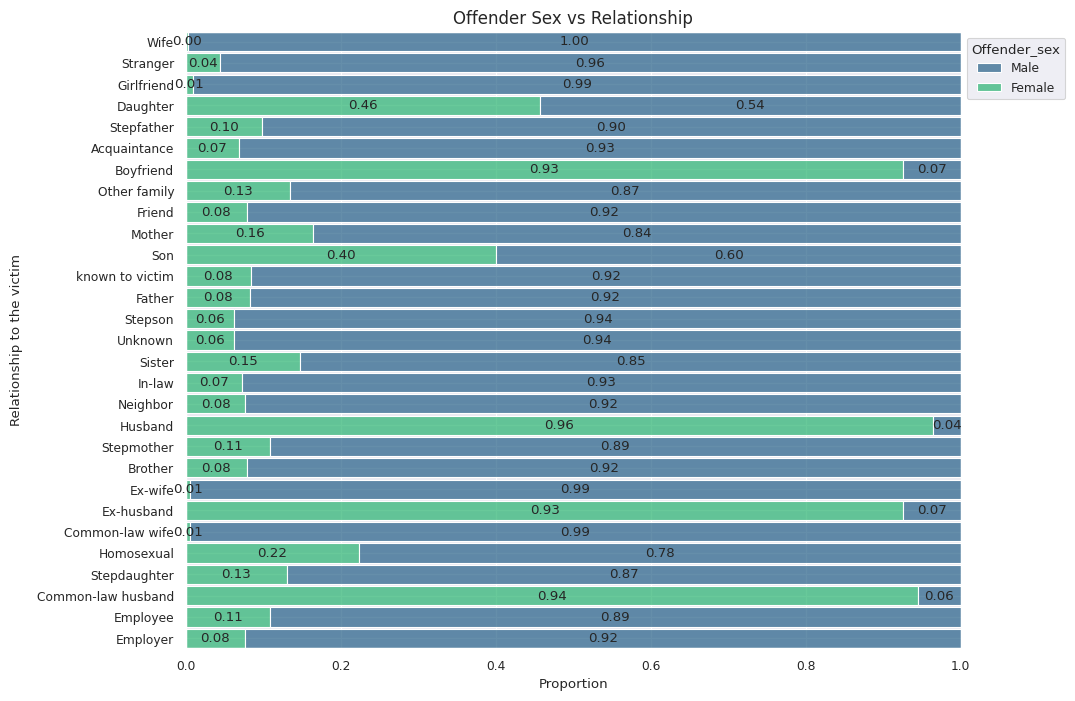

In [ ]:

# Distribution of Offender sex vs relationship
fig = plt.figure(figsize=(10, 8))


ax_sb = sns.histplot(df2,y ='Relationship',stat='percent',hue='Offender_sex',
                    multiple="fill", shrink=.9,
                    palette='viridis')
for container in ax_sb.containers:
    ax_sb.bar_label(container,fmt='%.2f',label_type='center')
sns.move_legend(ax_sb, "upper left", bbox_to_anchor=(1, 1))


plt.ylabel("Relationship to the victim",labelpad=10)
plt.xlabel("Proportion")
plt.title("Offender Sex vs Relationship",fontsize=12)
plt.show()

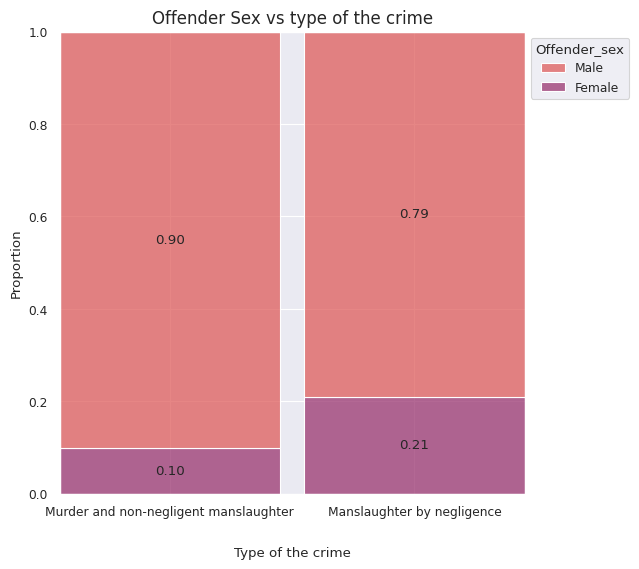

In [ ]:
# Distribution of Offender sex vs crime type
fig = plt.figure(figsize=(6,6))

ax_sb = sns.histplot(df2,x ='Crime_type',stat='percent',hue='Offender_sex',
                    multiple="fill",shrink= 0.9,
                    palette='flare')
for container in ax_sb.containers:
    ax_sb.bar_label(container,fmt='%.2f',label_type='center')
sns.move_legend(ax_sb, "upper left", bbox_to_anchor=(1, 1))


plt.xlabel("Type of the crime",labelpad=20)
plt.ylabel("Proportion")
plt.title("Offender Sex vs type of the crime",fontsize=12)
plt.show()

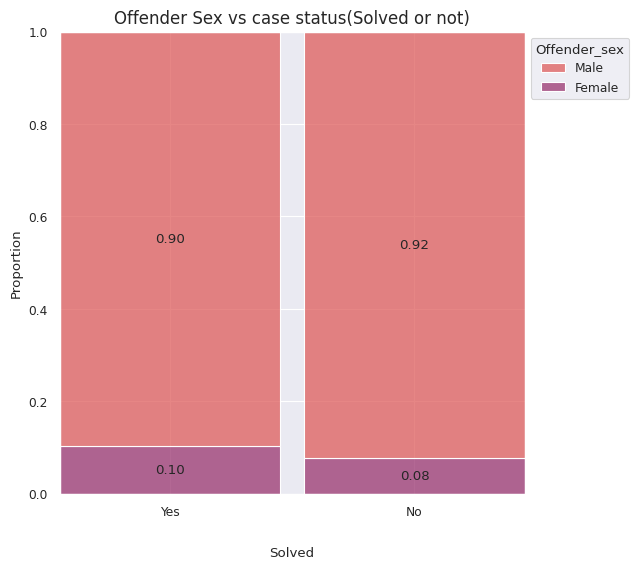

In [ ]:
# Distribution of Offender sex vs crime type
fig = plt.figure(figsize=(6,6))

ax_sb = sns.histplot(df2,x ='Solved',stat='percent',hue='Offender_sex',
                    multiple="fill",shrink= 0.9,
                    palette='flare')
for container in ax_sb.containers:
    ax_sb.bar_label(container,fmt='%.2f',label_type='center')
sns.move_legend(ax_sb, "upper left", bbox_to_anchor=(1, 1))


plt.xlabel("Solved",labelpad=20)
plt.ylabel("Proportion")
plt.title("Offender Sex vs case status(Solved or not)",fontsize=12)
plt.show()

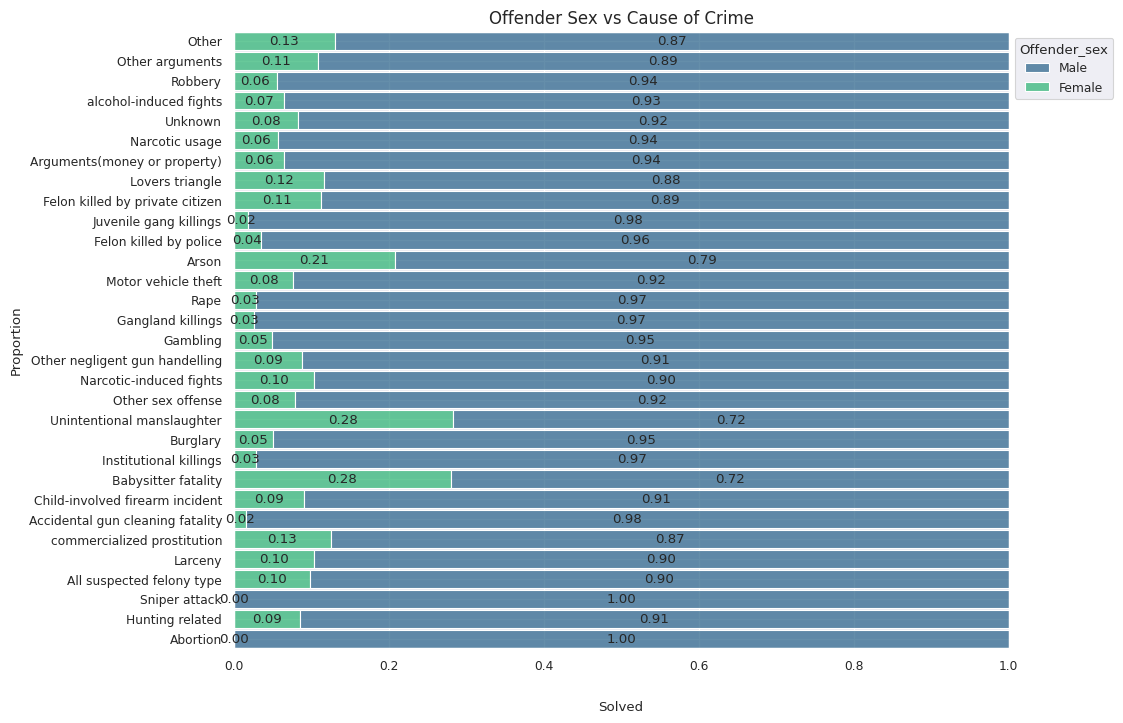

In [ ]:
# Distribution of Offender sex vs crime type
fig = plt.figure(figsize=(10,8))

ax_sb = sns.histplot(df2,y ='Crime_cause',stat='percent',hue='Offender_sex',
                    multiple="fill",shrink= 0.9,
                    palette='viridis')
for container in ax_sb.containers:
    ax_sb.bar_label(container,fmt='%.2f',label_type='center')
sns.move_legend(ax_sb, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Solved",labelpad=20)
plt.ylabel("Proportion")
plt.title("Offender Sex vs Cause of Crime",fontsize=12)
plt.show()

Multivariate Analysis

In [ ]:
# Correlation Coefficient of numerical variables
#num_var = df2[['Year','Offender_age','Victim_age','add_victim_count','add_offender_count']]
#sns.heatmap(num_var.corr(method = 'pearson'), annot=True,cmap = "vlag")  #annot_kws={"size": 7} # coolwarm
#plt.title("Correlation coefficients of numerical variables",fontsize=12)

Text(0.5, 1.0, 'Scatter Matrix of numerical variables')

<Figure size 600x600 with 0 Axes>

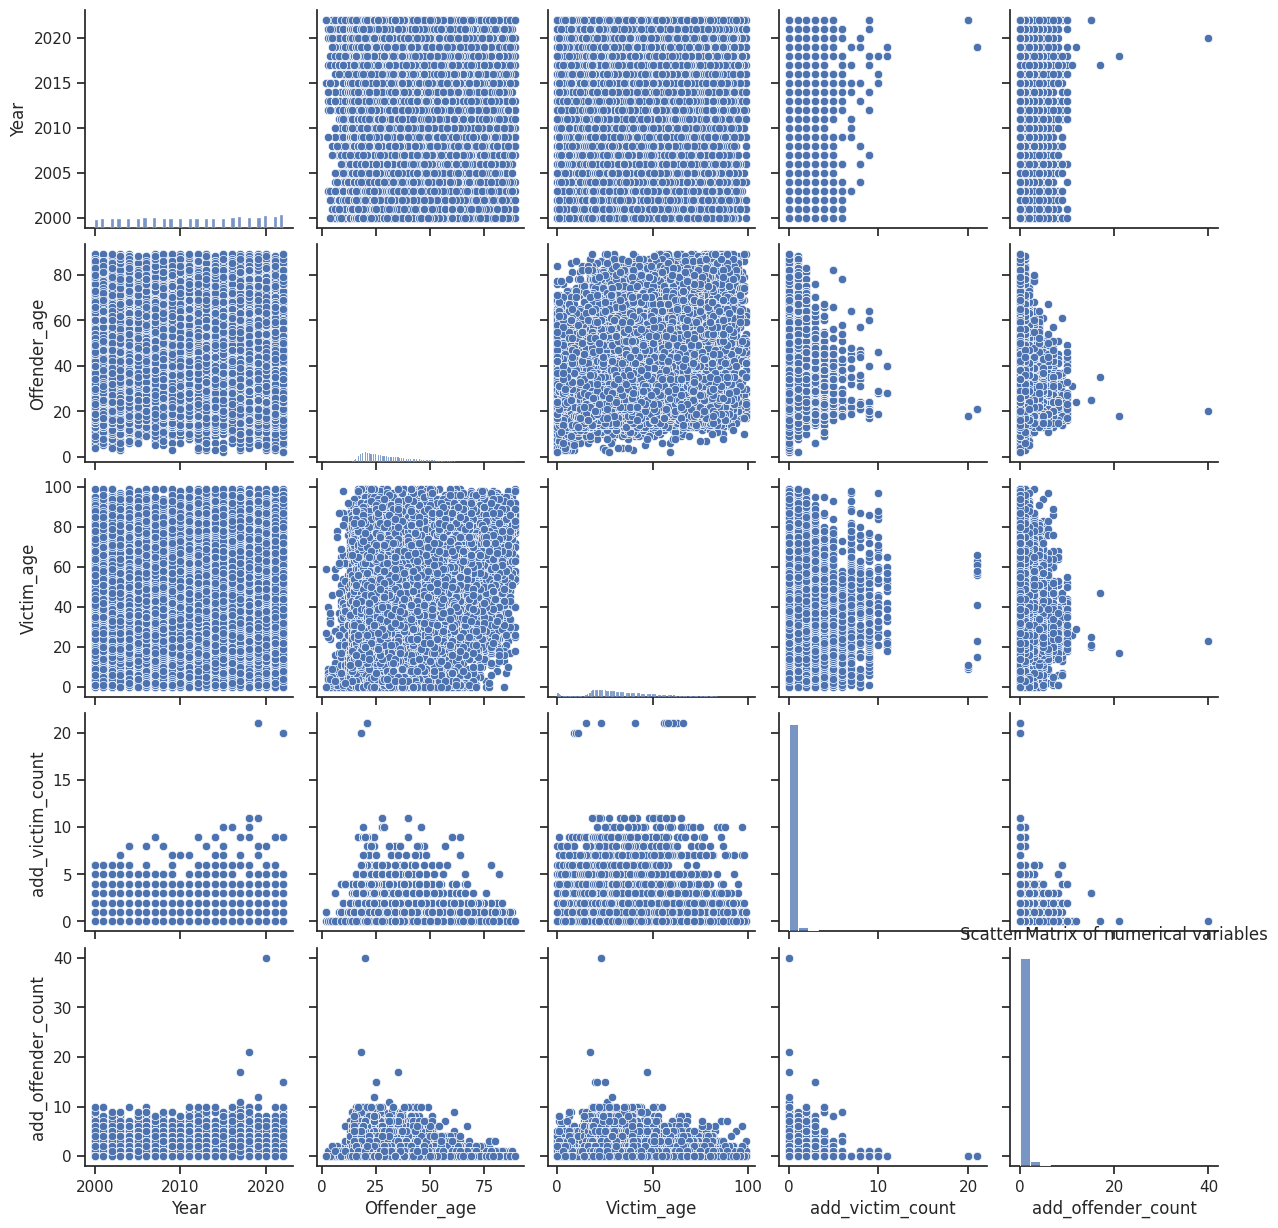

In [ ]:
# Scatter Matrix of numerical variables
num_var = df2[['Year','Offender_age','Victim_age','add_victim_count','add_offender_count']]
fig = plt.figure(figsize=(6,6))
sns.set_theme(style="ticks")
sns.pairplot(num_var)
plt.title("Scatter Matrix of numerical variables",fontsize=12)